In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

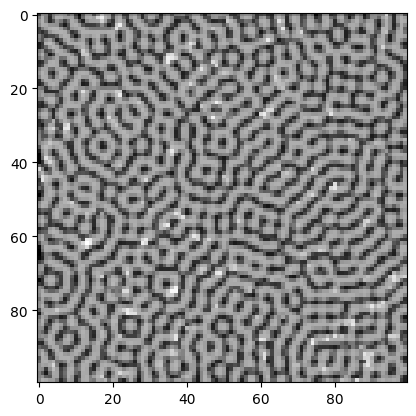

In [3]:
im_path = r"D:\Experiment Quality\input_images\im_1.tiff"
im1 = np.asarray(Image.open(im_path))
plt.imshow(im1, cmap='gray')
plt.show()

In [4]:

shifted = np.roll(np.roll(im1, 100, axis=0), 100, axis=1)
shifted = np.fft.fftshift(shifted)

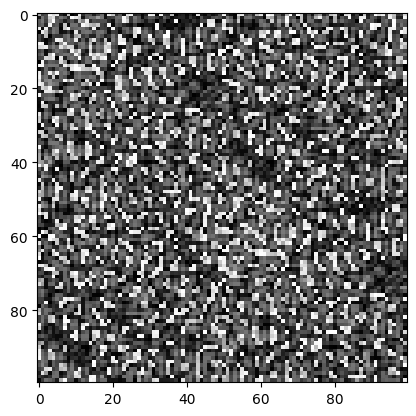

In [5]:
wrapped = im1 + shifted
plt.imshow(wrapped, cmap='gray')
plt.show()

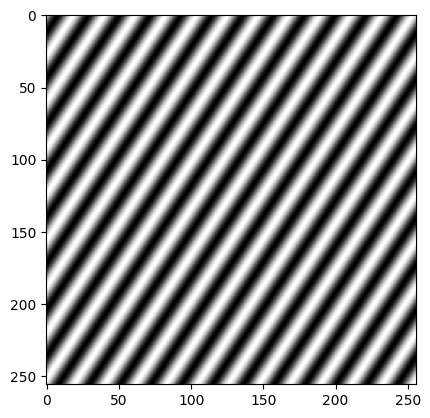

In [6]:
# Generate a torus-shaped image in Fourier space
num_freqs = 256 # number of Fourier frequencies in each dimension
img_fft = np.zeros((num_freqs, num_freqs), dtype=complex)

# Set Fourier coefficients for a simple pattern
freq_x = 8
freq_y = 12
amplitude = 10
phase = np.pi/4
img_fft[freq_x, freq_y] = amplitude*np.exp(1j*phase)

# Use the inverse DFT to transform back into image space
img_ifft = np.fft.ifft2(img_fft).real

# Show the resulting image
plt.imshow(img_ifft, cmap='gray')
plt.show()

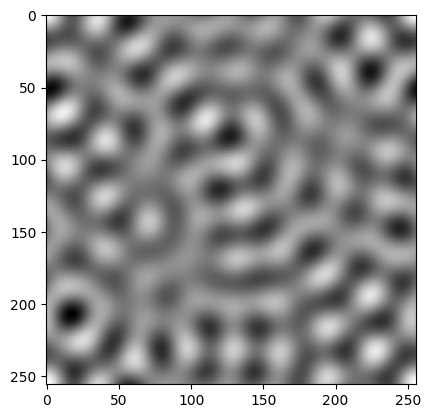

In [13]:
# Generate a torus-shaped image in Fourier space
num_freqs = 256 # number of Fourier frequencies in each dimension
img_fft = np.zeros((num_freqs, num_freqs), dtype=complex)

# Set Fourier coefficients for a ring of radius 8
radius = 8
for i in range(num_freqs):
    for j in range(num_freqs):
        freq_x = i - num_freqs//2
        freq_y = j - num_freqs//2
        if np.sqrt(freq_x**2 + freq_y**2) >= radius-0.5 and np.sqrt(freq_x**2 + freq_y**2) <= radius+0.5:
            img_fft[i, j] = 1 + 2j*np.random.normal(1,1)

# Use the inverse DFT to transform back into image space
img_ifft = np.fft.ifft2(np.fft.fftshift(img_fft)).real

# Show the resulting image
plt.imshow(img_ifft, cmap='gray')
plt.show()